In [1]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Data inputing

Input equation type (example: explicit)

In [2]:
equation_type = str(input())

implicit


Input N - number of x > 0 (recommended: 50)

In [6]:
N = int(input())

50


Input K - number of t > 0 (recommended: 100-500)

In [4]:
K = int(input())

100


Input T - number of step > 0 (recommended: 1)

In [5]:
T = int(input())

1


Вариант 7:
\begin{align}
    \frac {\partial^2{u}} {\partial{t^2}} + 2 \frac {\partial{u}} {\partial{t}}= \frac {\partial ^ 2 {u}} {\partial{x^2}} + 2 \frac {\partial{u}} {\partial{x}} - 3u, \\
U(0, t) = exp(-t) \cdot cos(2t), \\
U(\frac {\pi} {2}, t) = 0, \\
U(x, 0) = exp(-x) \cdot cos(x), \\
U_t(x, 0) = -exp(-x) \cdot cos(x)
\end{align}

Аналитическое решение:
\begin{align}
U(x, t) = exp(-t - x) \cdot cos(x) \cdot cos(2t)
\end{align}

In [7]:
params = {
        'a': 1,
        'b': 2,
        'c': -3,
        'd': 2,
        'l': np.pi / 2,
        'f': lambda: 0,
        'alpha': 1,
        'beta': 0,
        'gamma': 1,
        'delta': 0,
        'psi1': lambda x: np.exp(-x) * np.cos(x),
        'psi2': lambda x: -np.exp(-x) * np.cos(x),
        'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
        'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
        'phi0': lambda t: np.exp(-t) * np.cos(2 * t),
        'phi1': lambda t: 0,
        'bound_type': 'a1p2',
        'approximation': 'p1',
        'solution': lambda x, t: np.exp(-t - x) * np.cos(x) * np.cos(2 * t),
    }

Input type of approximation:
1. 2 point first degree
2. 3 point second degree
3. 2 point second degree

In [18]:
aprox = int(input())
if (aprox == 1):
    params['bound_type'] = 'a1p1'
elif (aprox == 2):
    params['bound_type'] = 'a1p2'
else:
    params['bound_type'] = 'a1p3'

2


In [8]:
solver = HyperbolicSolver(params, equation_type)

In [19]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [20]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi, np.pi / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    ax.plot_surface(x, t, z1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

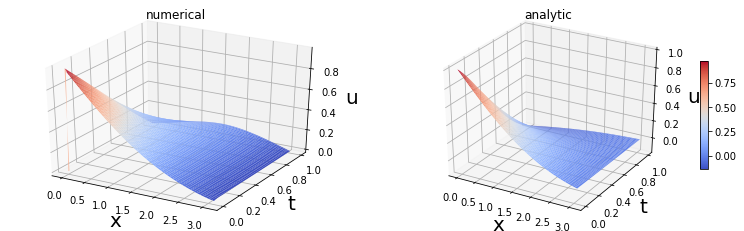

In [21]:
draw(dict_ans, N, K, T)

In [22]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

First elements in error array:

In [23]:
print(error[0])

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Middle elements in error array:

In [24]:
print(error[int(K/2)])

[0.1627677287774184, 0.16276439462493486, 0.16276605840615133, 0.16272535791075293, 0.1625990253749029, 0.16234828745119573, 0.16193926442435747, 0.16134335335602007, 0.16053760377559487, 0.15950509822138784, 0.15823525504727776, 0.1567241549175249, 0.1549750670048384, 0.15299876641804785, 0.1508127668540712, 0.14843912332296935, 0.1459014799074258, 0.1432224800699814, 0.14042226196171076, 0.1375180704428065, 0.13452457783631053, 0.13145444003031212, 0.12831874875886198, 0.12512716673506147, 0.12188753381062073, 0.1186045833104552, 0.11527716181139074, 0.11189320441054688, 0.10842217099901522, 0.10480651770085901, 0.10095772030687448, 0.09676732152741631, 0.092144387989685, 0.08707865721179406, 0.0816988143447986, 0.07626467758171561, 0.07104668473867592, 0.06614098221288453, 0.06138159801190803, 0.05647576091446348, 0.05124747093439477, 0.045711048086056444, 0.03992575123219465, 0.03389846171365961, 0.02763744454206461, 0.021167322878983263, 0.014499230383835894, 0.007650615274707987,

Last elements in error array:

In [25]:
print(error[-1])

[0.1638089381603428, 0.16381044232444847, 0.16436273217283587, 0.16541639862013657, 0.1669202249442779, 0.1688212533547604, 0.1710646755273313, 0.17359344498165485, 0.1763474918005091, 0.1792624511741157, 0.1822679462075349, 0.1852857441956468, 0.18822854527884098, 0.19100066157950452, 0.1935021182072309, 0.1956372932094514, 0.19732767051630834, 0.19852562190108214, 0.19922333514234147, 0.19945009634841143, 0.19925428659518402, 0.1986739982283932, 0.19770877861161626, 0.1963082741620959, 0.19438643115634685, 0.19185460244832792, 0.18865407876607962, 0.1847696006615298, 0.18022062821231116, 0.1750430579290226, 0.169276321255315, 0.16296001928403156, 0.15613451152270402, 0.1488404060734413, 0.14111720771625405, 0.13300278388864256, 0.12453345272181882, 0.11574407157097785, 0.10666822361137523, 0.09733849804630272, 0.08778669536938566, 0.07804399938595306, 0.0681411184002932, 0.05810837634652101, 0.047975792040706594, 0.03777313651842184, 0.027529983380802422, 0.0172757548502714, 0.007039

In [26]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.1493994342169391


In [27]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 0.0014939943421693911
